In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import csv

In [12]:
#Read Excel file in pandas
df = pd.read_excel('C:\\Users\\fleet\\Downloads\\Telegram Desktop\\Stage_4.xlsx')
print(df.isnull().sum())

Стадия ХСН                 0
3-OH Anthranillic acid    48
5-hydroxytryptophan       60
5-Methoxytryptamine       43
Adenosin                  47
                          ..
C5-OH                     54
C6                        53
C6-DC                     47
C8                        57
C8-1                      49
Length: 93, dtype: int64


In [13]:
df['Стадия ХСН'].replace(['Стадия 1','Предсердечная недостаточность'],[0,1],inplace=True)
print(df.isnull().sum())

Стадия ХСН                 0
3-OH Anthranillic acid    48
5-hydroxytryptophan       60
5-Methoxytryptamine       43
Adenosin                  47
                          ..
C5-OH                     54
C6                        53
C6-DC                     47
C8                        57
C8-1                      49
Length: 93, dtype: int64


In [14]:
x = df.iloc[:,1:]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
non = imputer.fit_transform(x)
x = pd.DataFrame(non, columns=x.columns)

y = df.iloc[:,0]
df = pd.concat([y,x],axis=1)
print(df)

     Стадия ХСН  3-OH Anthranillic acid  5-hydroxytryptophan  \
0             1                0.021702            -0.960852   
1             1               -0.029566            -0.714603   
2             1               -0.012953            -1.325450   
3             1               -0.015564            -0.960852   
4             1               -0.015564            -0.960852   
..          ...                     ...                  ...   
168           0                0.007491            -1.025408   
169           0               -0.015564            -0.908399   
170           0               -0.001810            -0.960852   
171           0               -0.027353            -0.960852   
172           0               -0.015564            -1.635258   

     5-Methoxytryptamine  Adenosin      ADMA    Alanine  Antranillic acid  \
0              -0.033918  0.002593  0.002390  -4.913100          0.146703   
1              -0.056097 -0.005721  0.097622   8.341591         -0.300639   


In [15]:
print('\nСтадия 1', sum(df['Стадия ХСН'] == 0),\
        '\nПредсердечная недостаточность', sum(df['Стадия ХСН'] == 1))


Стадия 1 117 
Предсердечная недостаточность 56


In [16]:
df.to_csv('D:\\Documents\\phenotype.csv', index= True, quoting=csv.QUOTE_NONNUMERIC)
#Data visualization
y.value_counts()

0    117
1     56
Name: Стадия ХСН, dtype: int64

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)
x_norm.describe()

,3-OH Anthranillic acid,5-hydroxytryptophan,5-Methoxytryptamine,Adenosin,ADMA,Alanine,Antranillic acid,Arginine,Asparagine,Aspartic acid,...,C3,C4,C5,C5-1,C5-DC,C5-OH,C6,C6-DC,C8,C8-1
count,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,...,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02
mean,0.000000,1.026796e-16,7.187571e-17,-6.160775e-17,-8.727765e-17,7.700969e-17,6.417474e-17,-2.053592e-17,3.080388e-17,1.283495e-18,...,-9.241163e-17,3.593786e-17,-5.133979e-17,2.605494e-16,-9.241163e-17,7.187571e-17,-5.133979e-17,-1.796893e-16,5.647377e-17,-8.984464e-17
std,1.002903,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,...,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00,1.002903e+00
min,-0.725015,-1.134349e+00,-1.475804e+00,-1.612295e+00,-2.231417e+00,-1.833121e+00,-8.499080e-01,-1.999410e+00,-1.836846e+00,-1.902542e+00,...,-1.896577e+00,-1.642209e+00,-1.976033e+00,-1.764918e+00,-1.746100e+00,-2.095214e+00,-1.789377e+00,-1.284789e+00,-1.653718e+00,-1.176069e+00
25%,-0.559850,-5.721606e-01,-6.696798e-01,-6.215502e-01,-4.370931e-01,-6.534835e-01,-5.217799e-01,-7.221054e-01,-5.413118e-01,-6.250122e-01,...,-6.675510e-01,-5.829633e-01,-7.804684e-01,-7.115408e-01,-6.327962e-01,-5.201012e-01,-5.455743e-01,-7.073494e-01,-4.968369e-01,-6.427849e-01
50%,-0.353296,-3.197655e-01,-1.096878e-01,-1.941308e-01,5.141290e-02,-1.868843e-01,-3.156646e-01,-1.151311e-01,-1.294437e-01,-1.003508e-01,...,-7.830746e-02,-1.919394e-01,3.903820e-02,-3.766320e-02,-1.016505e-01,-2.443480e-03,-9.208393e-02,-3.115841e-01,-1.969549e-01,-2.554079e-01
75%,-0.075978,1.254592e-01,5.122618e-01,4.499454e-01,4.674293e-01,6.524212e-01,-1.291709e-01,7.163286e-01,4.902641e-01,4.199441e-01,...,5.153942e-01,4.435350e-01,5.624571e-01,5.305924e-01,3.918518e-01,5.523766e-01,4.756119e-01,6.200659e-01,3.132960e-01,1.355205e-01
max,3.966302,3.060229e+00,2.762746e+00,2.578184e+00,2.187134e+00,2.233366e+00,3.732878e+00,2.353020e+00,2.442112e+00,2.723053e+00,...,2.427915e+00,2.754164e+00,2.237208e+00,2.713861e+00,2.598797e+00,1.965228e+00,2.755969e+00,2.516525e+00,2.624889e+00,3.549549e+00


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.2,random_state=0)

In [20]:
#Performing models
models ={
    'Decision Tree':DecisionTreeClassifier(random_state=0),
    'Random Forest':RandomForestClassifier(random_state=0),
    'KNN':KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'SVM': SVC(random_state=0)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=3)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted', zero_division= 0)
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted', zero_division= 0)
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
   
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('='*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')


Decision Tree
CV mean score: 0.63 (+/- 0.01)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7714
F1 Score: 0.7714
Precision: 0.7714
Recall: 0.7714


Random Forest
CV mean score: 0.69 (+/- 0.09)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7714
F1 Score: 0.7312
Precision: 0.8304
Recall: 0.7714


KNN
CV mean score: 0.71 (+/- 0.07)
Model performance for Training set:
Accuracy: 0.8696
F1 Score: 0.8657
Precision: 0.8689
Recall: 0.8696
-----------------------------------
Model performance for Test set:
Accuracy: 0.7714
F1 Score: 0.7658
Precision: 0.7657
Recall: 0.7714


Gradient Boosting
CV mean score: 0.71 (+/- 0.08)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
---

In [21]:
#Hyperparamenter Training
rf_params = {'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'criterion':  ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 4],
              'class_weight': ['balanced', None]}
dt_params = { 'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20],
              'min_samples_leaf': [1, 2, 4],
              'criterion':  ['gini', 'entropy']}
KNN_params = {'n_neighbors': [3,5,10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'metric': ['euclidean', 'manhattan'],
              'leaf_size': [20, 50, 100]}
GB_params = {'max_depth': [3,5,8,15, None],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'loss': ['log_loss'],
              'criterion':  ['squared_error', 'friedman_mse'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20]}
svc_params = {'C': [1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'decision_function_shape': ['ovo', 'ovr'],
              'class_weight': ['balanced', None]}
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


In [22]:
randomcv_models = [
                    ('RF', RandomForestClassifier(), rf_params),
                    ('DT', DecisionTreeClassifier(), dt_params),
                    ('KNN', KNeighborsClassifier(), KNN_params),
                    ('GB', GradientBoostingClassifier(), GB_params),
                    ('SVM', SVC(), svc_params)
                    ]

In [23]:
""" #RandomizedSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,\
                                param_distributions = params,\
                                cv =3,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name]) """

' #RandomizedSearchCV hyperparameters pulling methods \nmodel_param = {}\nfor name,model,params in randomcv_models:\n    random = RandomizedSearchCV(estimator = model,                                param_distributions = params,                                cv =3,                                verbose=2,                                n_jobs=-1)\n    random.fit(x_train,y_train)\n    model_param[name] = random.best_params_\n    \nfor model_name in model_param:\n    print(f"---------Best Params for {model_name}---------")\n    print(model_param[model_name]) '

In [33]:
gridcv_models = [
                ('RF', RandomForestClassifier(), rf_params),
                ('DT', DecisionTreeClassifier(), dt_params),

]

In [35]:
#GridSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in gridcv_models:
    random = GridSearchCV(estimator = model,\
                                param_grid = params,\
                                cv =3,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name])

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 270 candidates, totalling 810 fits
---------Best Params for RF---------
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
---------Best Params for DT---------
{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [37]:
#Performing models
models ={
    'Random Forest':RandomForestClassifier(random_state = 0, n_estimators = 100, min_samples_split= 2, criterion = 'gini'),
    'Gradient Boosting':GradientBoostingClassifier(random_state=0, max_depth = 15, min_samples_split= 2, n_estimators = 100, loss = 'log_loss',\
                                                   criterion = 'squared_error', max_features = 'log2', min_samples_leaf= 2),
    'DT': DecisionTreeClassifier(random_state = 0),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted', zero_division= 0)
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted', zero_division= 0)
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    print('-'*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Random Forest
CV mean score: 0.72 (+/- 0.11)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7714
F1 Score: 0.7312
Precision: 0.8304
Recall: 0.7714


Gradient Boosting
CV mean score: 0.75 (+/- 0.12)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7714
F1 Score: 0.7312
Precision: 0.8304
Recall: 0.7714


DT
CV mean score: 0.64 (+/- 0.24)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7714
F1 Score: 0.7714
Precision: 0.7714
Recall: 0.7714




In [27]:
GB = GradientBoostingClassifier(random_state=0, max_depth = 15, min_samples_split= 2,\
                                n_estimators = 100, loss = 'log_loss', criterion = 'squared_error',\
                                max_features = 'log2', min_samples_leaf= 2)
GB.fit(x_train,y_train)
proba = GB.predict_proba(x_test)
predicted = GB.predict(x_test)
proba_r = np.round(proba, decimals=3)
y_test_groups = list(y_test)
for i in range(len(y_test_groups)):
    print('Probability of class {}'.format(proba_r[i]*100))
    print('Predicted class: {}'.format(predicted[i]))
    print('Real class: {}'.format(y_test_groups[i]))
    print('\n')

Probability of class [ 0.3 99.7]
Predicted class: 1
Real class: 1


Probability of class [99.8  0.2]
Predicted class: 0
Real class: 0


Probability of class [98.  2.]
Predicted class: 0
Real class: 0


Probability of class [28.8 71.2]
Predicted class: 1
Real class: 1


Probability of class [73. 27.]
Predicted class: 0
Real class: 0


Probability of class [99.9  0.1]
Predicted class: 0
Real class: 0


Probability of class [99.2  0.8]
Predicted class: 0
Real class: 1


Probability of class [99.7  0.3]
Predicted class: 0
Real class: 0


Probability of class [99.6  0.4]
Predicted class: 0
Real class: 0


Probability of class [99.8  0.2]
Predicted class: 0
Real class: 0


Probability of class [96.8  3.2]
Predicted class: 0
Real class: 0


Probability of class [99.9  0.1]
Predicted class: 0
Real class: 0


Probability of class [ 4.4 95.6]
Predicted class: 1
Real class: 1


Probability of class [99.4  0.6]
Predicted class: 0
Real class: 0


Probability of class [99.8  0.2]
Predicted class: 0


In [28]:
#Classificatio report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       1.00      0.33      0.50        12

    accuracy                           0.77        35
   macro avg       0.87      0.67      0.68        35
weighted avg       0.83      0.77      0.73        35



In [29]:
#AUC ROC
roc = roc_auc_score(y_test, predicted)
print(roc)

0.6666666666666666


In [38]:
from pycm import ConfusionMatrix
y_test = np.array(y_test)
predicted = np.array(predicted)
cm = ConfusionMatrix(actual_vector=y_test,predict_vector=predicted)
print(cm)

Predict  0        1        
Actual
0        23       0        

1        8        4        





Overall Statistics : 

95% CI                                                            (0.63231,0.91055)
ACC Macro                                                         0.77143
ARI                                                               0.242
AUNP                                                              0.66667
AUNU                                                              0.66667
Bangdiwala B                                                      0.71616
Bennett S                                                         0.54286
CBA                                                               0.53763
CSI                                                               0.53763
Chi-Squared                                                       8.65591
Chi-Squared DF                                                    1
Conditional Entropy                                             

In [30]:
#SHAP
import shap
shap.initjs()

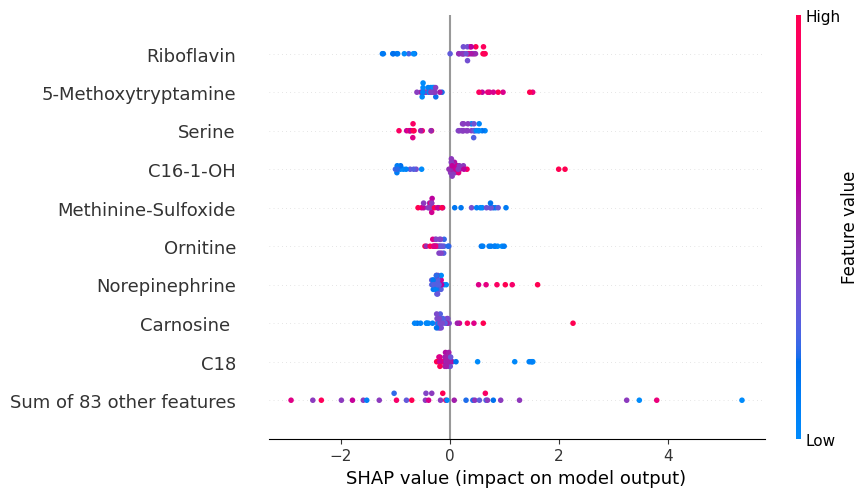

In [40]:
explainer = shap.Explainer(GB)
shap_values = explainer(x_test)
#Show most importtant features
shap.plots.beeswarm(shap_values)


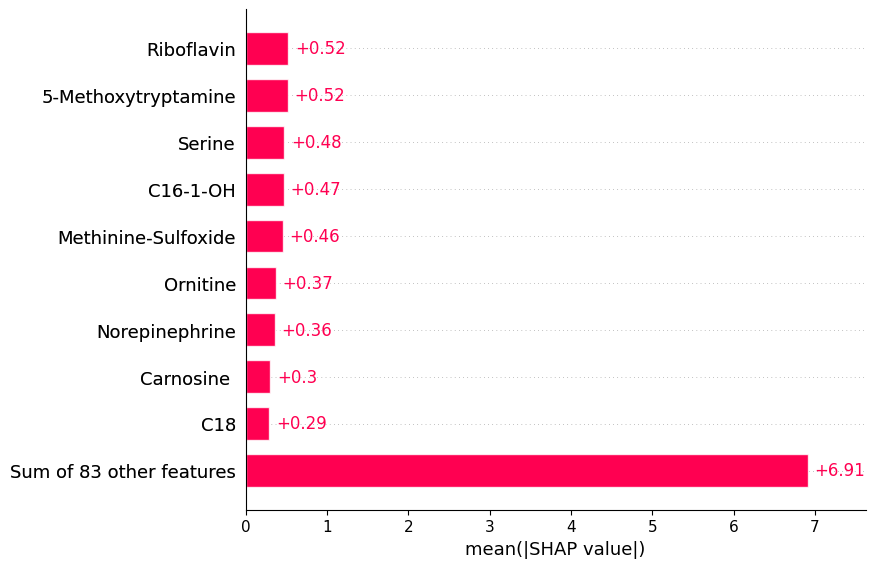

In [45]:
shap.plots.bar(shap_values)